### Start Tensorboard

Start tensorboard server:
```cli
$tensorboard --logdir=path/to/log-directory
```

Link:
 [overall](https://www.tensorflow.org/api_docs/python/tf/summary/FileWriter)

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
import pandas as pd

In [12]:
tf.app.flags.FLAGS

### Basic summary

```python
X = tf.placeholder(tf.float32, (None, 2), name='X')
y = tf.placeholder(tf.float32, (2, 1), name='y')

with tf.name_scope('this_is_scope'):
    re = tf.matmul(X, y)
    tf.summary.scalar('mean', re)
    tf.summary.histogram('histogram', re)

sess = tf.InteractiveSession()

sess.run(re, feed_dict={X:[[1,2],[3,4],[5,6]], y:[[2],[2]]})


train_writer = tf.summary.FileWriter('./plus',
                                      sess.graph)
```

### model_dir in estimator

((10000,), (10000,), (10000,))

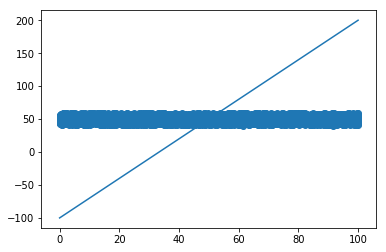

In [2]:
x1 = np.arange(start=0, stop=100, step=0.01)
x2 = 10*np.random.rand(x1.shape[0])+10*np.random.rand(x1.shape[0]) + 40
y_bound = 3*x1-100
y = x1+2>y_bound
plt.plot(x1,y_bound)
plt.scatter(x1, x2)
x1.shape, x2.shape, y.shape

In [6]:
feature_1 = tf.feature_column.numeric_column('x1')
feature_2 = tf.feature_column.numeric_column('x2')
features = [feature_1, feature_2]

input_func = tf.estimator.inputs.numpy_input_fn( x={
                                                    'x1': x1,
                                                    'x2': x2
                                                 },
                                                 y=y,
                                                 batch_size=1000,
                                                 num_epochs=999999999,
                                                 shuffle=True)
optimizer = tf.train.AdamOptimizer(learning_rate=3)
model = tf.estimator.LinearClassifier(feature_columns=features, optimizer=optimizer, model_dir='tmp/tensorboard')
model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'tmp/tensorboard', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x123bf6588>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tmp/tensorboard/model.ckpt-100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 101 into tmp/tensorboa

In [5]:
test_input_func = tf.estimator.inputs.numpy_input_fn(
    x={
        'x1': x1,
        'x2': x2
    },
    y=y,
    batch_size=1000,
    num_epochs=1000,
    shuffle=False)
eval_metrics = model.evaluate(input_fn=test_input_func,steps=1)
eval_metrics

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-18-05:05:19
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tmp/tensorboard/model.ckpt-100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2018-04-18-05:05:20
INFO:tensorflow:Saving dict for global step 100: accuracy = 1.0, accuracy_baseline = 1.0, auc = 0.0, auc_precision_recall = 1.0, average_loss = 0.0, global_step = 100, label/mean = 1.0, loss = 0.0, prediction/mean = 1.0


{'accuracy': 1.0,
 'accuracy_baseline': 1.0,
 'auc': 0.0,
 'auc_precision_recall': 1.0,
 'average_loss': 0.0,
 'label/mean': 1.0,
 'loss': 0.0,
 'prediction/mean': 1.0,
 'global_step': 100}